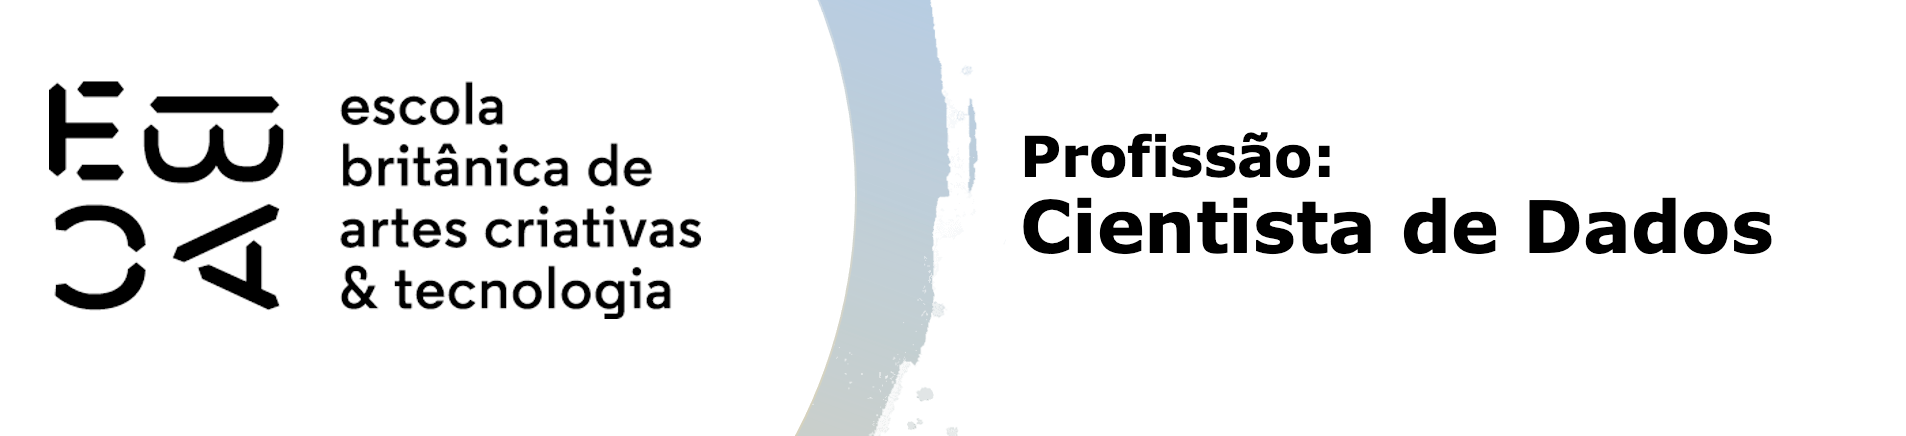

# Análise descritiva

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


In [2]:
# Para realizar a analise, primeiro retirarei os valores faltantes e iguais a 0 da varivel 'Retorno'
df_filtro = df.dropna(subset=['Retorno'])
df_filtro

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [3]:
# Conversão da 'Data emissão' para o formato datetime
df_filtro['Data Emissão'] = pd.to_datetime(df_filtro['Data Emissão'])

C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\3480572831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['Data Emissão'] = pd.to_datetime(df_filtro['Data Emissão'])


In [4]:
# Proximo passo é criar as variaveis que foram solicitadas
# Dia da semana e seu respectivo nome
df_filtro["Dia da Semana"] = df_filtro["Data Emissão"].dt.dayofweek
df_filtro["Nome Dia da Semana"] = df_filtro["Data Emissão"].dt.day_name(locale="pt_BR.utf8")

# Dummy para fim de semana
df_filtro["Fim de semana"] = df_filtro["Dia da Semana"].isin([5, 6]).astype(int)

# Dia do mês
df_filtro["Dia do Mês"] = df_filtro["Data Emissão"].dt.day

# Mês
df_filtro["Mês"] = df_filtro["Data Emissão"].dt.month

# Trimestre
df_filtro["Trimestre"] = df_filtro["Data Emissão"].dt.quarter

df_filtro

C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\2145447526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["Dia da Semana"] = df_filtro["Data Emissão"].dt.dayofweek
C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\2145447526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["Nome Dia da Semana"] = df_filtro["Data Emissão"].dt.day_name(locale="pt_BR.utf8")
C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\2145447526.py:7: SettingWithCopyWarning: 
A value is trying to be set on

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,Dia da Semana,Nome Dia da Semana,Fim de semana,Dia do Mês,Mês,Trimestre
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado,4,Sexta-feira,0,30,6,2
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto,4,Sexta-feira,0,30,6,2
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes,4,Sexta-feira,0,30,6,2
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes,4,Sexta-feira,0,30,6,2
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes,4,Sexta-feira,0,30,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido,3,Quinta-feira,0,7,1,1
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado,3,Quinta-feira,0,7,1,1
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia,3,Quinta-feira,0,7,1,1
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado,3,Quinta-feira,0,7,1,1


In [5]:
# Criações das categorizações da variavel 'Valor NF', por quantis.
df_filtro["Valor NF - 5"] = pd.qcut(df_filtro["Valor NF"], 5)
df_filtro["Valor NF - 10"] = pd.qcut(df_filtro["Valor NF"], 10)
df_filtro["Valor NF - 20"] = pd.qcut(df_filtro["Valor NF"], 20)
df_filtro["Valor NF - 50"] = pd.qcut(df_filtro["Valor NF"], 50)
df_filtro

C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\3606535752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["Valor NF - 5"] = pd.qcut(df_filtro["Valor NF"], 5)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\3606535752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["Valor NF - 10"] = pd.qcut(df_filtro["Valor NF"], 10)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\3606535752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,Dia da Semana,Nome Dia da Semana,Fim de semana,Dia do Mês,Mês,Trimestre,Valor NF - 5,Valor NF - 10,Valor NF - 20,Valor NF - 50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,4,Sexta-feira,0,30,6,2,"(13.7, 28.9]","(20.655, 28.9]","(20.655, 24.86]","(23.9, 25.5]"
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,4,Sexta-feira,0,30,6,2,"(28.9, 55.4]","(39.155, 55.4]","(46.6, 55.4]","(48.5, 51.13]"
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,4,Sexta-feira,0,30,6,2,"(13.7, 28.9]","(20.655, 28.9]","(24.86, 28.9]","(25.5, 27.047]"
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,4,Sexta-feira,0,30,6,2,"(55.4, 132.1]","(82.35, 132.1]","(102.25, 132.1]","(107.82, 119.9]"
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,4,Sexta-feira,0,30,6,2,"(55.4, 132.1]","(82.35, 132.1]","(102.25, 132.1]","(119.9, 132.1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,...,3,Quinta-feira,0,7,1,1,"(132.1, 562500.0]","(132.1, 258.9]","(177.8, 258.9]","(219.292, 258.9]"
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,...,3,Quinta-feira,0,7,1,1,"(132.1, 562500.0]","(258.9, 562500.0]","(258.9, 443.508]","(312.4, 390.902]"
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,...,3,Quinta-feira,0,7,1,1,"(55.4, 132.1]","(82.35, 132.1]","(102.25, 132.1]","(119.9, 132.1]"
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,...,3,Quinta-feira,0,7,1,1,"(28.9, 55.4]","(39.155, 55.4]","(39.155, 46.6]","(41.58, 44.9]"


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [6]:
# Definição das variaveis a serem analisadas
covariaveis = ["Valor NF - 5", "Valor NF - 10", "Valor NF - 20", "Valor NF - 50", "Fim de semana", "Dia do Mês", "Mês", "Trimestre", "Ano"]
resposta = "flag_credito"

In [7]:
# Como serão realizados muitos calculos para o IV, criarei uma função para facilitar o processo
def calculo_IV(df, variavel, resposta):
    # Criação da tabela de frequências
    tabela = pd.crosstab(df[variavel], df[resposta])
    tabela.columns = ['Negativo', 'Positivo']

    # Total de observações
    total_positivo = tabela['Positivo'].sum()
    total_negativo = tabela['Negativo'].sum()

    # Cálculo das proporções
    tabela['Prop_positivo'] = tabela['Positivo'] / total_positivo
    tabela['Prop_negativo'] = tabela['Negativo'] / total_negativo

    # Calculo de WOE
    tabela['WOE'] = np.log(tabela['Prop_positivo'] / tabela['Prop_negativo'])

    # Calculo do IV
    tabela['IV'] = (tabela['Prop_positivo'] - tabela['Prop_negativo']) * tabela['WOE']
  
    return tabela['IV'].sum()

In [8]:
# Criação dos metadados
metadados = pd.DataFrame(columns=["Variável", "papel", "tipo", "n_categorias", "IV"])

for var in covariaveis:
    tipo = str(df_filtro[var].dtype)

    # Numero de categorias
    n_categorias = df_filtro[var].nunique()

    # Cálculo do IV
    iv = calculo_IV(df_filtro, var, resposta)

    # Preenchimento do dataframe de metadados
    metadados = pd.concat([
        metadados,
        pd.DataFrame([{
            "Variável": var,
            "papel": "covariavel",
            "tipo": tipo,
            "n_categorias": n_categorias,
            "IV": iv
        }])
    ], ignore_index=True)

metadados = pd.concat([
    metadados,
    pd.DataFrame([{
        "Variável": resposta,
        "papel": "resposta",
        "tipo": str(df_filtro[resposta].dtype),
        "n_categorias": df_filtro[resposta].nunique(),
        "IV": np.nan
    }])
], ignore_index=True)

metadados

C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\2099850919.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metadados = pd.concat([


,Variável,papel,tipo,n_categorias,IV
0,Valor NF - 5,covariavel,category,5,0.050725
1,Valor NF - 10,covariavel,category,10,0.093307
2,Valor NF - 20,covariavel,category,20,0.111032
3,Valor NF - 50,covariavel,category,50,0.129105
4,Fim de semana,covariavel,int64,2,0.004704
5,Dia do Mês,covariavel,int32,31,0.043254
6,Mês,covariavel,int32,12,0.028076
7,Trimestre,covariavel,int32,4,0.011754
8,Ano,covariavel,int64,5,0.040141
9,flag_credito,resposta,int64,2,NaN


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

**As variáveis que apresentam maior poder de discriminação são:**

- **Valor NF - 20**
- **Valor NF - 50**

**Ao realizar a categorização das variaveis continuas é possivel observar que, conforme foram criadas mais categorizações para os dados presentes nas variaveis, o IV aumenta também.**

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\1801736221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["ano_trimestre"] = df_filtro["Ano"].astype(str) + "-T" + df_filtro["Trimestre"].astype(str)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_19748\1801736221.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Categoria", bbox_to_anchor=(1.02, 1), loc="upper left")


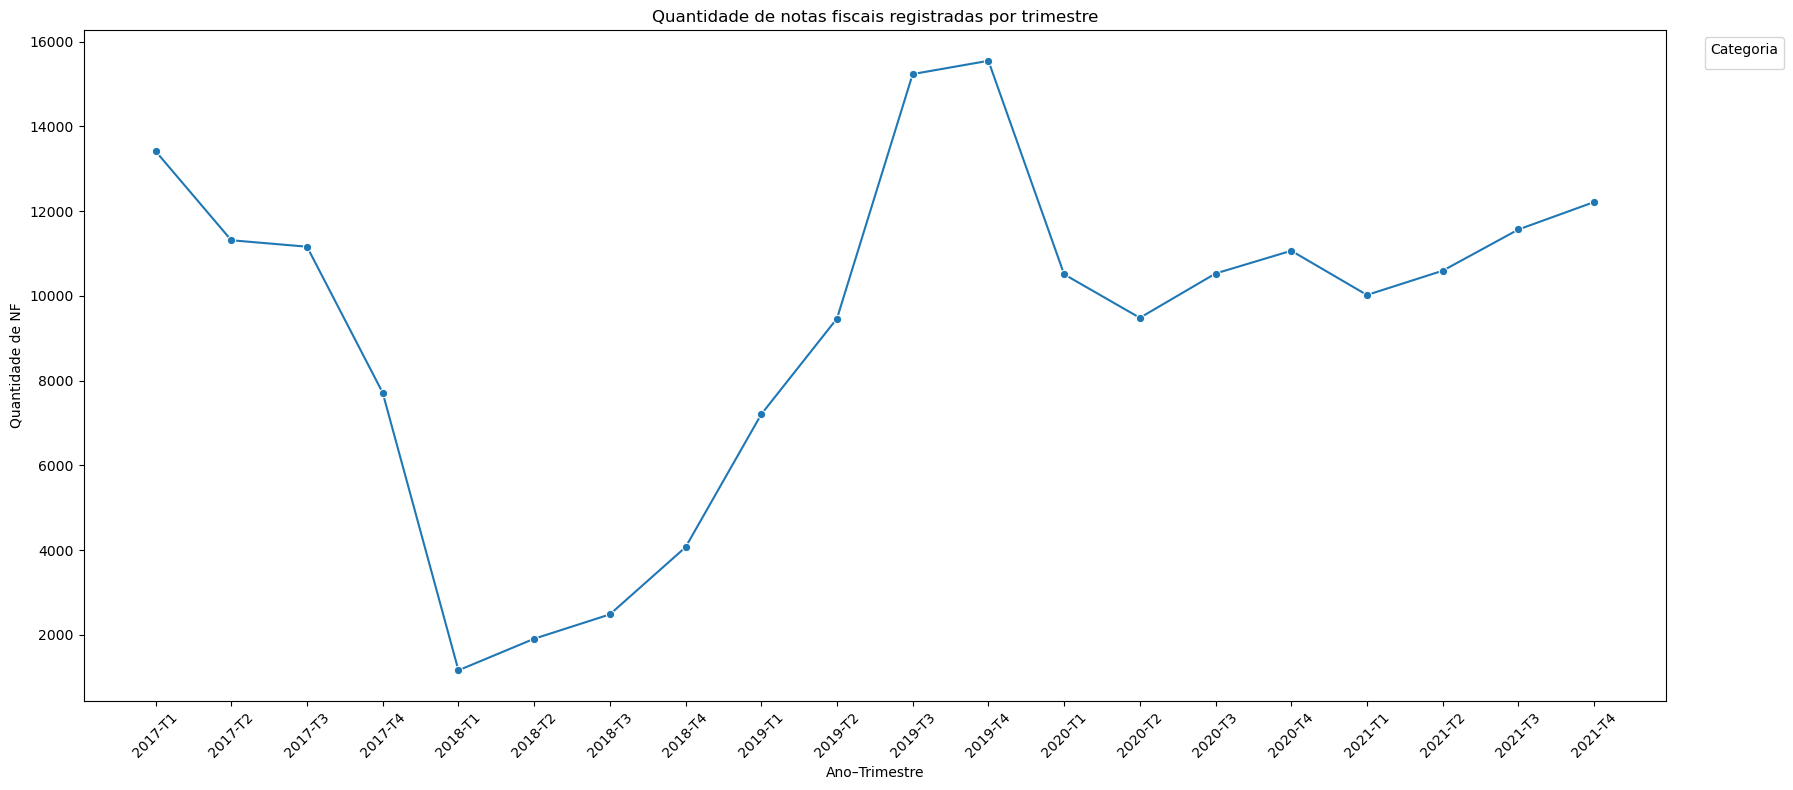

In [9]:
# Quantidade de notas na base por periodo, utilizando trimestre por ano como agregador
df_filtro["ano_trimestre"] = df_filtro["Ano"].astype(str) + "-T" + df_filtro["Trimestre"].astype(str)

qtd_nf_trimestre = (df_filtro.groupby(["ano_trimestre"]).size().reset_index(name="Quantidade Notas Fiscais"))

plt.figure(figsize=(18,8))
sns.lineplot(data=qtd_nf_trimestre, x="ano_trimestre", y="Quantidade Notas Fiscais", marker="o")
plt.title("Quantidade de notas fiscais registradas por trimestre")
plt.xlabel("Ano–Trimestre")
plt.ylabel("Quantidade de NF")
plt.xticks(rotation=45)
plt.legend(title="Categoria", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



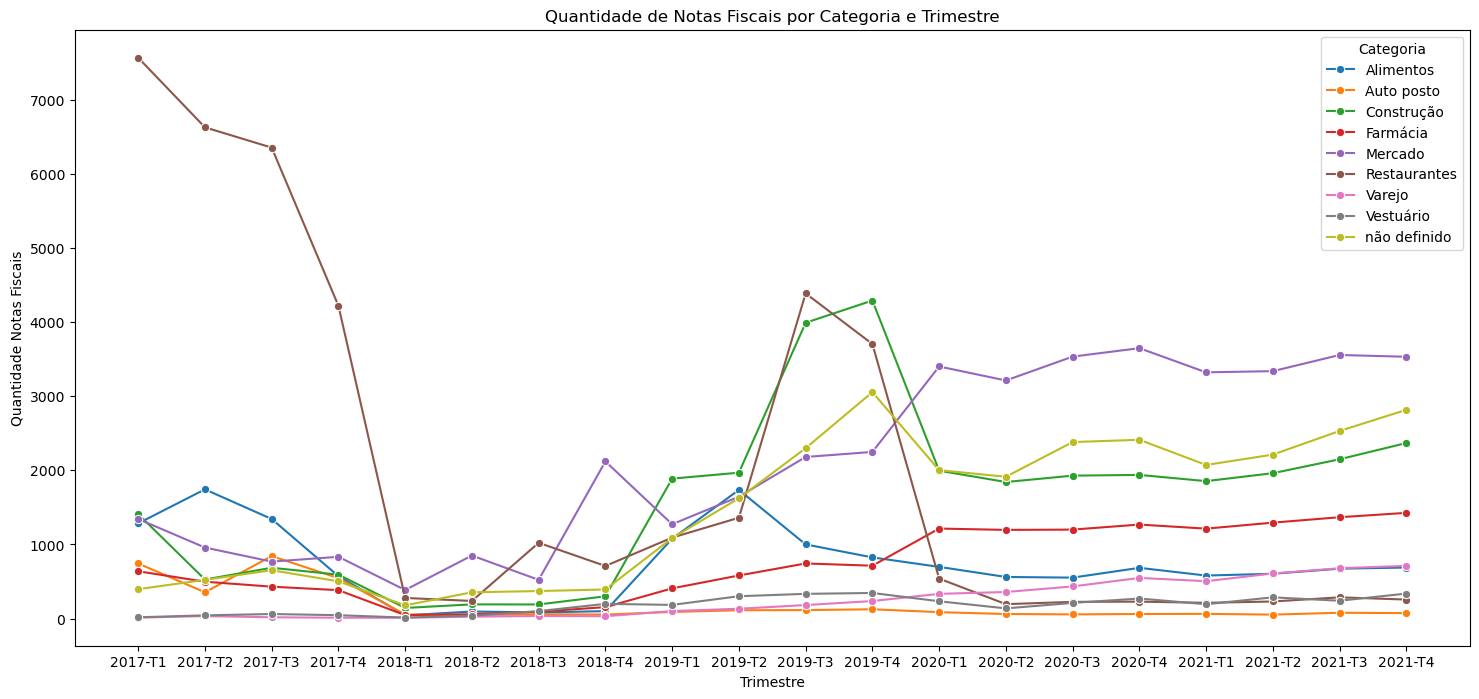

In [10]:
# Grafico da quantidade de notas por categoria e trimestre por respectivo ano

qtd_nf_categoria = df_filtro.groupby([ 'ano_trimestre', 'categoria']).size().reset_index(name='Quantidade Notas Fiscais')

plt.figure(figsize=(18, 8))
sns.lineplot(qtd_nf_categoria, x="ano_trimestre", y="Quantidade Notas Fiscais", hue="categoria", marker='o')
plt.title("Quantidade de Notas Fiscais por Categoria e Trimestre")
plt.ylabel("Quantidade Notas Fiscais")
plt.xlabel("Trimestre")
plt.legend(title='Categoria')
plt.show()

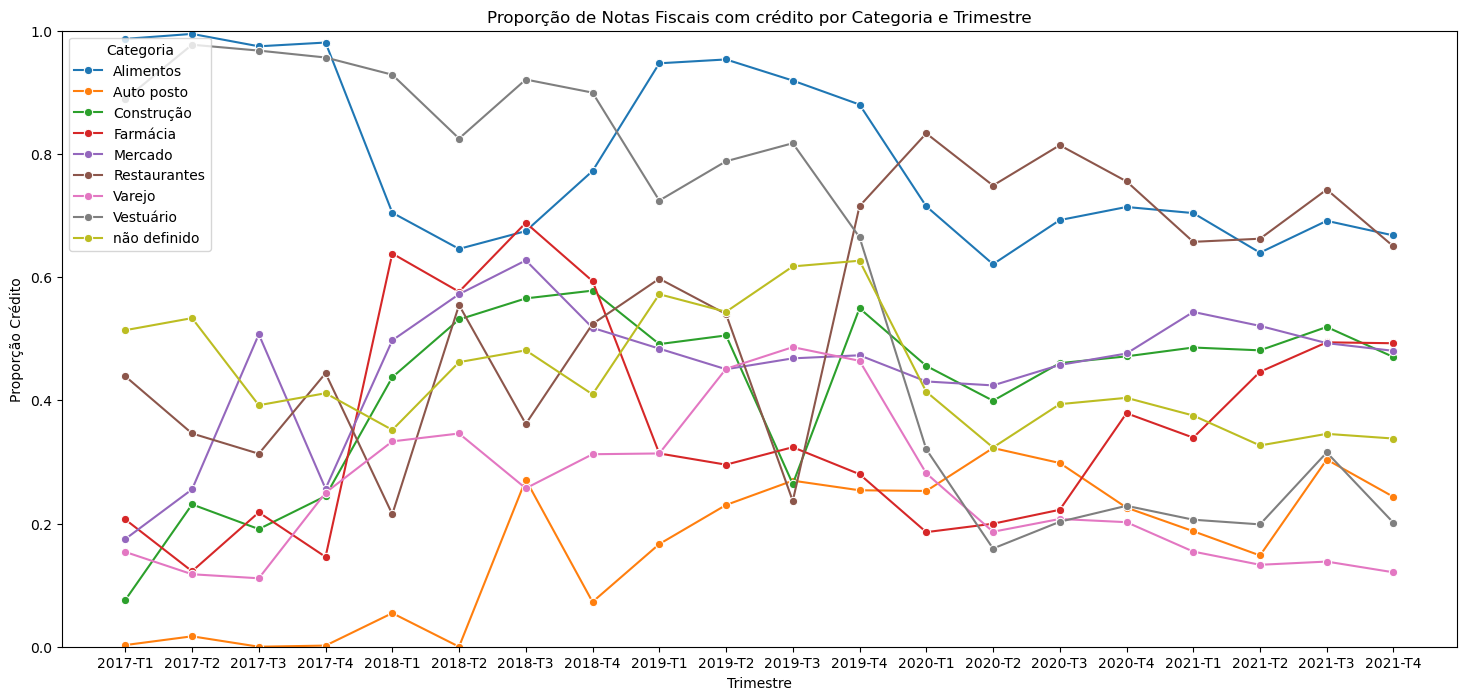

In [11]:
# Proporção de notas com credito por categoria e trimestre
proporcao_credito_categoria = df_filtro.groupby(['ano_trimestre', 'categoria'])['flag_credito'].mean().reset_index(name='Proporção Crédito')

# Grafico
plt.figure(figsize=(18, 8))
sns.lineplot (data=proporcao_credito_categoria, x="ano_trimestre", y= "Proporção Crédito", hue="categoria", marker='o')
plt.title("Proporção de Notas Fiscais com crédito por Categoria e Trimestre")
plt.ylabel("Proporção Crédito")
plt.xlabel("Trimestre")
plt.ylim(0, 1)
plt.legend(title="Categoria")
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [12]:
# Para calcular o WOE e IV ao longo do tempo para "categoria", é mais facil criar uma função

def calc_woe_iv_tempo(df, variavel, resposta):

    tab=pd.crosstab(df[variavel], df[resposta])
    tab.columns = ['Negativo', 'Positivo']
    total_evento = tab['Positivo'].sum()
    total_nao_evento = tab['Negativo'].sum()
    tab['Percent_positivo'] = tab['Positivo'] / total_evento
    tab['Percent_negativo'] = tab['Negativo'] / total_nao_evento
    tab['WOE'] = np.log(tab['Percent_positivo'] / tab['Percent_negativo'])
    tab['IV'] = (tab['Percent_positivo'] - tab['Percent_negativo']) * tab['WOE']

    return tab.reset_index(), tab['IV'].sum()

resultados = []

for (Ano, trimestre), grupo in df_filtro.groupby(["Ano", "Trimestre"]):
    periodo = f"{Ano}-T{trimestre}"
    tabela, iv_total = calc_woe_iv_tempo(grupo, variavel = "categoria", resposta="flag_credito")
    tabela["ano"]= Ano
    tabela["ano_trimestre"] = periodo
    tabela["IV_Total"] = iv_total
    resultados.append(tabela)

df_woe_iv_tempo = pd.concat(resultados, ignore_index=True)
print(df_woe_iv_tempo)

        categoria  Negativo  Positivo  Percent_positivo  Percent_negativo  \
0       Alimentos        17      1268          0.239788          0.002091   
1      Auto posto       742         2          0.000378          0.091267   
2      Construção      1303       107          0.020234          0.160271   
3        Farmácia       507       132          0.024962          0.062362   
4         Mercado      1109       235          0.044440          0.136408   
..            ...       ...       ...               ...               ...   
175       Mercado      1836      1697          0.322317          0.264135   
176  Restaurantes        90       167          0.031719          0.012948   
177        Varejo       626        86          0.016334          0.090059   
178     Vestuário       270        68          0.012915          0.038843   
179  não definido      1865       952          0.180817          0.268307   

          WOE        IV   ano ano_trimestre  IV_Total  
0    4.742104  1.12

c:\Users\Rafael\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Rafael\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Conclua

- Quais categorias parecem ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

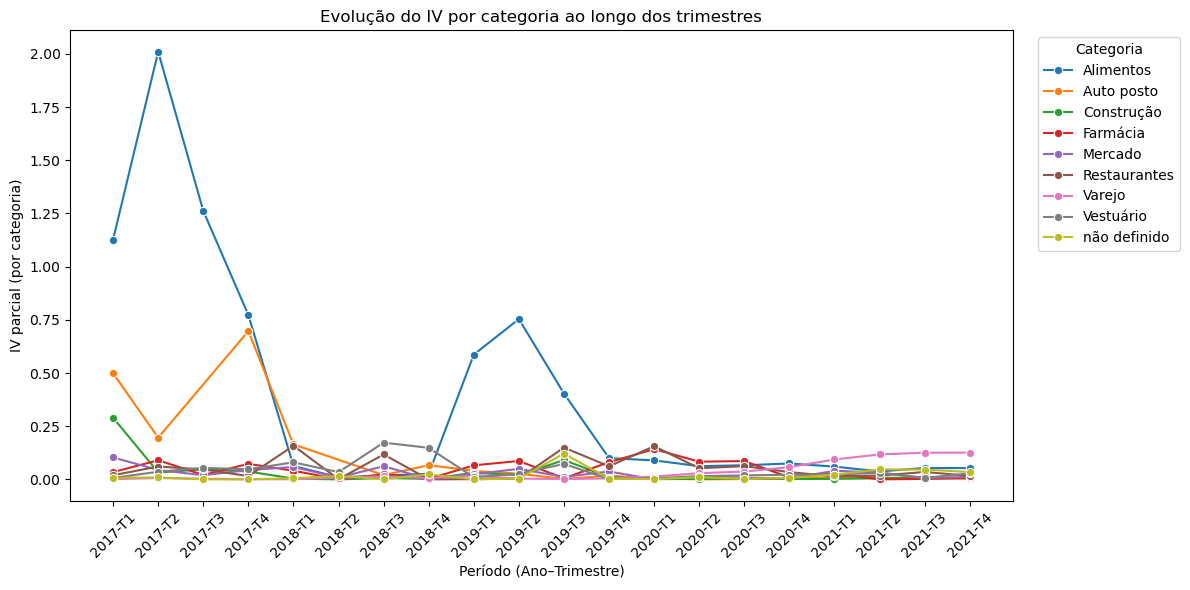

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_woe_iv_tempo, x="ano_trimestre", y="IV", hue="categoria", marker="o")
plt.title("Evolução do IV por categoria ao longo dos trimestres")
plt.xlabel("Período (Ano–Trimestre)")
plt.ylabel("IV parcial (por categoria)")
plt.xticks(rotation=45)
plt.legend(title="Categoria", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### É possível analisar que a categoria "Alimentos" possui um peso preditivo muito forte inicialmente, sendo alto até demais podendo indicar um problema de overfitting, que decai ao longo do passar do tempo. Este pode ser um problema dado o fato que esta variavel não possuir uma quantidade de amostras tão alta e também que o modelo em torno dela apresente um overfitting. A categoria "Auto posto" também sofre desta caracteristica. 
#### É válido ressaltar que essa situação não tem muita interferencia da Pandemia de COVID19, visto que seu periodo oficial foi de 2020 à 2023. Seria mais correto ligar a quantidade de notas ao grau de consumo presente na situação socioeconomica da epoca em questão. Visto que a porção da população que é representada em "alimentos" e uso de combustiveis("auto-posto") são carregadas pelo aumento do consumo desse tipo por pessoas que recebem até 3 salários mínimos, considerando que entre 2006 e 2016 houve uma valorização real do valor de salário minimo de em torno de 60%. Nos anos seguintes houve praticamente uma estagnação em seu valor. Após isso o aumento pode ser decorrido de um possivel aumento populaional do estado de SP, porém segundo interpretação de dados da Fundação SAEDE, houve um acrescimo de 41,2 milhões em 2010 para 44,6 milhões em 2020, chegando em 46 milhões em 2024.
